In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train), (x_test,y_test)= fashion_mnist.load_data()
print (x_train.shape)
x_train,x_test= x_train/255.0,x_test/255.0

(60000, 28, 28)


In [3]:
model=Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),layers.MaxPooling2D(2,2),
                  layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D(2,2),
                  layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D(2,2),
                  layers.Flatten(),
                  layers.Dense(64,activation='relu'),layers.Dense(10,activation='softmax')])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [25]:
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))
test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=2)
print("\nTest accuracy:", test_accuracy)



Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6459 - accuracy: 0.7903 - val_loss: 0.4852 - val_accuracy: 0.8280
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4111 - accuracy: 0.8507 - val_loss: 0.4342 - val_accuracy: 0.8454
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3625 - accuracy: 0.8663 - val_loss: 0.4184 - val_accuracy: 0.8495
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3359 - accuracy: 0.8763 - val_loss: 0.3818 - val_accuracy: 0.8666
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3138 - accuracy: 0.8830 - val_loss: 0.3770 - val_accuracy: 0.8644
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2997 - accuracy: 0.8903 - val_loss: 0.3611 - val_accuracy: 0.8744
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2821 - accuracy: 0.8959 - val_loss: 0.3640 -

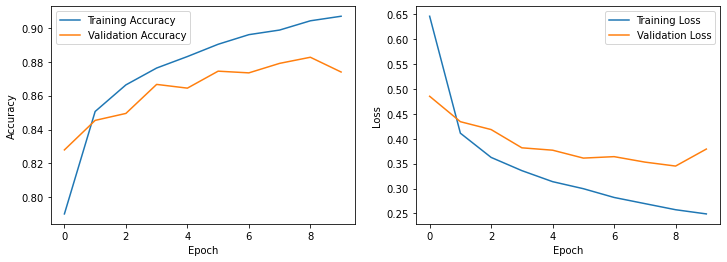

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [34]:
predictions = model.predict(x_test.reshape(-1,28,28,1))
predicted_labels=np.argmax(predictions,axis=1)



313/313 [==============================] - 1s 2ms/step


In [35]:
def plot_img(i, predictions_array,true_labels,img):
    predictions_array, true_labels,img=predictions_array[i],true_labels[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_labels=np.argmax(predictions_array)
    if predicted_labels==true_labels:
        color='blue'
    else:
        color='red'
    plt.xlabel(f"Predicted: {predicted_labels}{np.max(predictions_array)*100:.2f}%)",color=color)
    
               

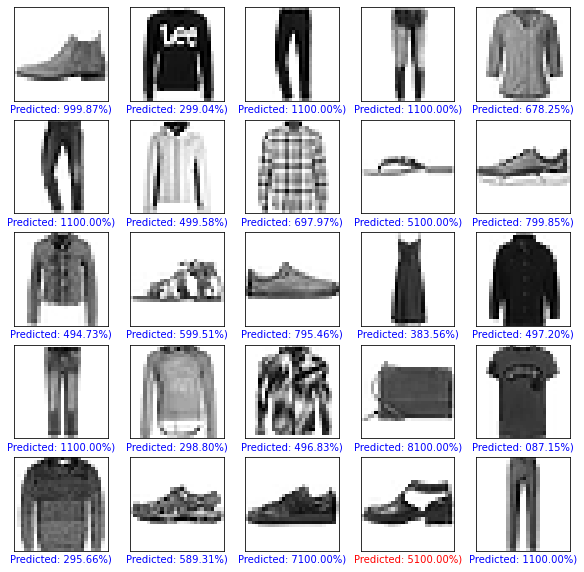

In [36]:
num_row=5
num_cols=5
num_images=num_row*num_cols
plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(num_row,num_cols,i+1)
    plot_img(i,predictions,y_test,x_test)
plt.show()